In [3]:
import os
import numpy as np
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import resize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/data/'

Mounted at /content/gdrive


In [5]:
CLASSES = ['speed', 'direction', 'other']

# Image Parameters
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [6]:
# Load Dataset and Extract HOG Features
def load_data_and_extract_hog(data_path, img_height, img_width, classes):
    hog_features = []
    labels = []
    for idx, class_name in enumerate(classes):
        class_path = os.path.join(data_path, 'Train', class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if os.path.isfile(img_path):  # Ensure it's a file
                # Read and resize the image
                img = imread(img_path)
                img_resized = resize(img, (img_height, img_width), anti_aliasing=True, mode='reflect')

                # Convert to grayscale for HOG
                if img_resized.ndim == 3:
                    img_resized = img_resized.mean(axis=-1)

                # Extract HOG features
                hog_feature = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
                hog_features.append(hog_feature)
                labels.append(idx)
    return np.array(hog_features), np.array(labels)

In [7]:
# Load Train Dataset
X, y = load_data_and_extract_hog(path, IMG_HEIGHT, IMG_WIDTH, CLASSES)

In [8]:
# Split Train and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluate the Model
y_pred_test = rf_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, y_pred_test))

Test Accuracy: 0.9456066945606695


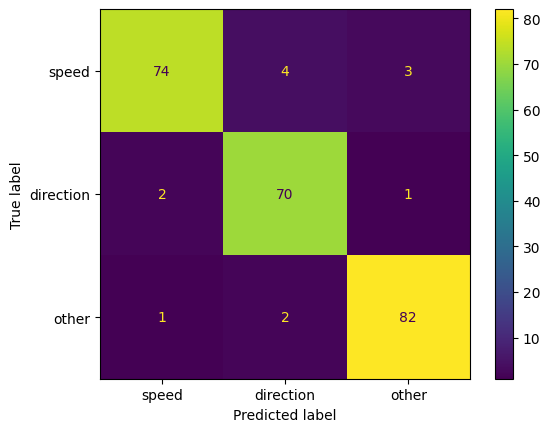

In [11]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
disp.plot()
plt.show()

In [12]:
# Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred_test, target_names=CLASSES))

Classification Report:
              precision    recall  f1-score   support

       speed       0.96      0.91      0.94        81
   direction       0.92      0.96      0.94        73
       other       0.95      0.96      0.96        85

    accuracy                           0.95       239
   macro avg       0.95      0.95      0.95       239
weighted avg       0.95      0.95      0.95       239



In [13]:
# Test with Random Image
def test_random_image(image_path, model, img_height, img_width):
    img = imread(image_path)
    img_resized = resize(img, (img_height, img_width), anti_aliasing=True, mode='reflect')

    # Convert to grayscale for HOG
    if img_resized.ndim == 3:
        img_resized = img_resized.mean(axis=-1)

    # Extract HOG features
    hog_feature = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    hog_feature = np.expand_dims(hog_feature, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(hog_feature)[0]
    # Get prediction probabilities
    prediction_proba = model.predict_proba(hog_feature)[0] #This line is added to calculate and store the probabilities
    print(f"Predicted: {CLASSES[prediction]}")

    # Display Result
    plt.imshow(img)
    plt.title(f"Predicted: {CLASSES[prediction]} (Confidence: {np.max(prediction_proba):.2f})")
    plt.axis('off')
    plt.show()

Predicted: speed


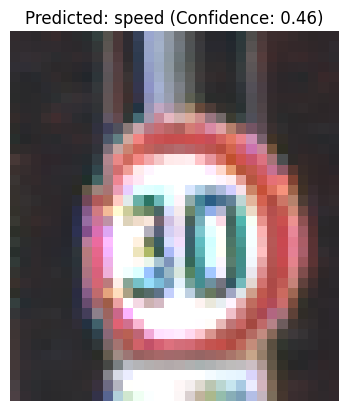

In [20]:
# Test
random_image_path = os.path.join(path, 'Test/speed070.png')  # Replace with speedxxx.png, directionxxx.png or otherxxx.png (xxx from 001-100)
test_random_image(random_image_path, rf_clf, IMG_HEIGHT, IMG_WIDTH)

Predicted: speed


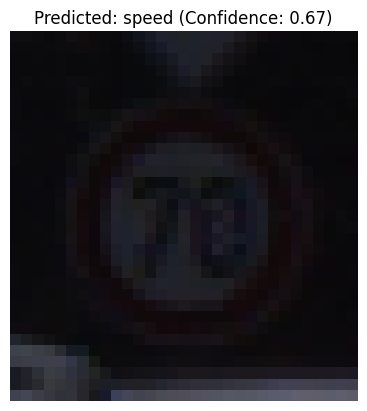

In [15]:
random_image_path = os.path.join(path, 'Test/speed053.png')  # Replace with speedxxx.png, directionxxx.png or otherxxx.png (xxx from 001-100)
test_random_image(random_image_path, rf_clf, IMG_HEIGHT, IMG_WIDTH)

Predicted: direction


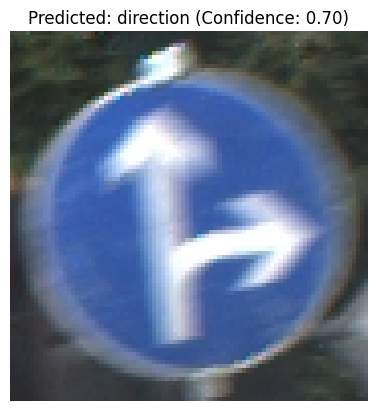

In [16]:
random_image_path = os.path.join(path, 'Test/direction089.png')  # Replace with speedxxx.png, directionxxx.png or otherxxx.png (xxx from 001-100)
test_random_image(random_image_path, rf_clf, IMG_HEIGHT, IMG_WIDTH)

Predicted: other


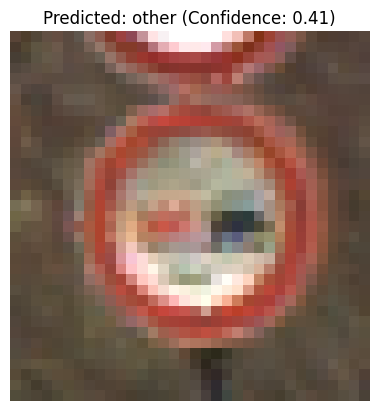

In [17]:
random_image_path = os.path.join(path, 'Test/other100.png')  # Replace with speedxxx.png, directionxxx.png or otherxxx.png (xxx from 001-100)
test_random_image(random_image_path, rf_clf, IMG_HEIGHT, IMG_WIDTH)